
image 1/1 c:\Users\Saad Surve\Desktop\Btech\TE Btech\Sem VI\Major Project\cat_dog.jpg: 448x640 1 cat, 1 dog, 498.4ms
Speed: 10.4ms preprocess, 498.4ms inference, 2372.7ms postprocess per image at shape (1, 3, 448, 640)
Object type: 16.0
Coordinates: [282.2730407714844, 20.081375122070312, 526.3067016601562, 381.0919189453125]
Probability: 0.9345553517341614
Execution time: 7.084477424621582 seconds


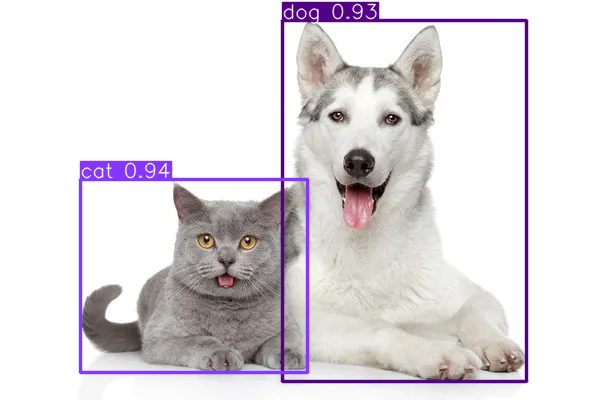

In [1]:
import time
from ultralytics import YOLO
from PIL import Image

start_time = time.time()

model = YOLO("yolov8m.pt")
results = model.predict('./cat_dog.jpg')    
result = results[0]

box = result.boxes[1]

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()

end_time = time.time()

execution_time = end_time - start_time

print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print("Execution time:", execution_time, "seconds")

Image.fromarray(result.plot()[:,:,::-1])

Original Code:

image 1/1 c:\Users\Saad Surve\Desktop\Btech\TE Btech\Sem VI\Major Project\cat_dog.jpg: 448x640 1 cat, 1 dog, 402.7ms
Speed: 2.0ms preprocess, 402.7ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Model: yolov8m.pt, Quantized: False
Object type: 16.0
Coordinates: [282.2730407714844, 20.081375122070312, 526.3067016601562, 381.0919189453125]
Probability: 0.9345553517341614
Execution time: 2.3041679859161377 seconds

Increasing Accuracy (Larger Model):

image 1/1 c:\Users\Saad Surve\Desktop\Btech\TE Btech\Sem VI\Major Project\cat_dog.jpg: 448x640 1 cat, 1 dog, 1244.8ms
Speed: 2.0ms preprocess, 1244.8ms inference, 11.2ms postprocess per image at shape (1, 3, 448, 640)
Model: yolov8x.pt, Quantized: False
Object type: 16.0
Coordinates: [282.0762634277344, 19.65602684020996, 526.5718383789062, 380.65869140625]
Probability: 0.9274076223373413
Execution time: 4.400320529937744 seconds

Decreasing Execution Time (Smaller Model + Quantization):

image 1/1 c:\User

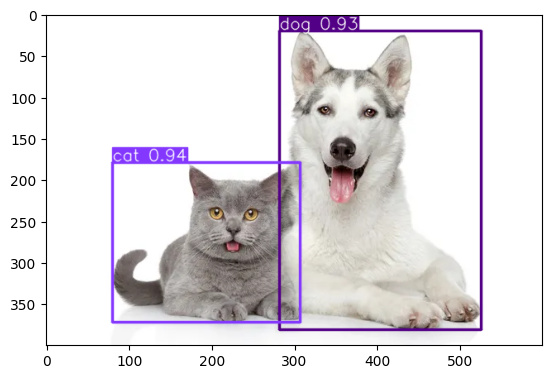

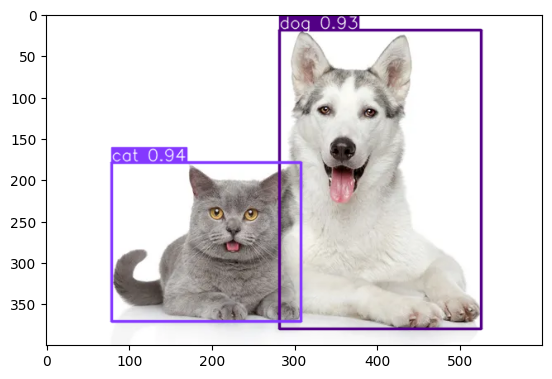

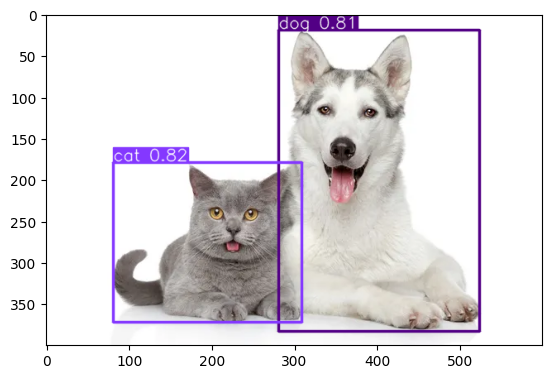

In [2]:
import time
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

def run_inference(model_name, quantize=False):
    start_time = time.time()
    model = YOLO(model_name)


    results = model.predict('./cat_dog.jpg')
    result = results[0]
    box = result.boxes[1]
    cords = box.xyxy[0].tolist()
    class_id = box.cls[0].item()
    conf = box.conf[0].item()
    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Model: {model_name}, Quantized: {quantize}")
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("Execution time:", execution_time, "seconds")
    plt.figure()
    plt.imshow( Image.fromarray(result.plot()[:, :, ::-1]))

# Original code
print("Original Code:")
run_inference("yolov8m.pt")

# Increasing accuracy by using a larger model
print("\nIncreasing Accuracy (Larger Model):")
run_inference("yolov8x.pt")

# Decreasing execution time by using a smaller model and quantization
print("\nDecreasing Execution Time (Smaller Model + Quantization):")
run_inference("yolov8n.pt", quantize=True)

## COLOR EXTRACTION

dict_values([17848, 6591, 8768, 7146, 3458])


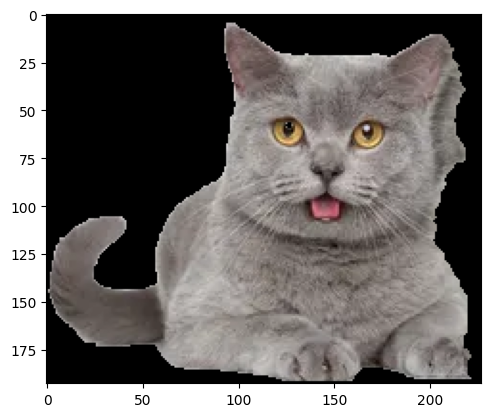

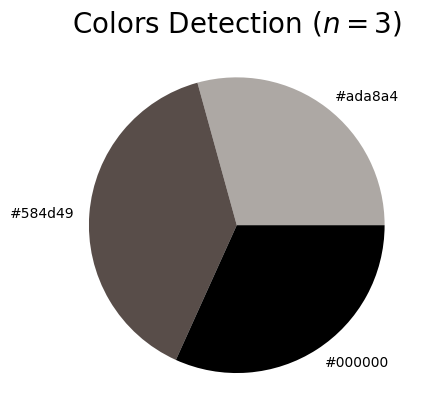

dict_values([36658, 18293, 7314, 2607, 23212])


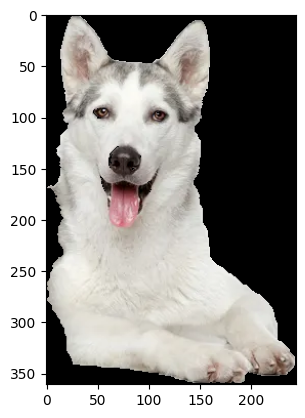

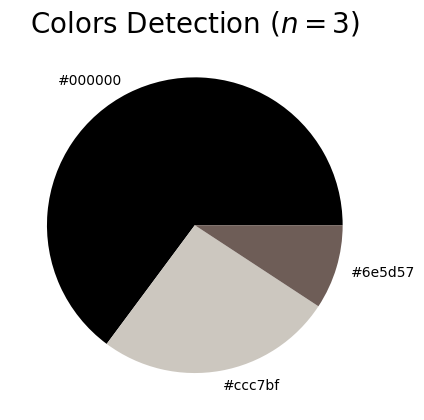

Elapsed time for color extraction: 1.3664250373840332 seconds


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2
from time import sleep
from IPython import display
import cv2
import numpy as np
from sklearn.cluster import KMeans


def colorIdentifyKMeans(boundary, image, num_colors=3):
    # Extract pixels within the boundary
    currImage = image[boundary[1]:boundary[3], boundary[0]:boundary[2]]
    # image = image[boundary[1]:boundary[3], boundary[0]:boundary[2]]
    number_of_colors = 5
    modified_image = currImage.reshape(currImage.shape[0]*currImage.shape[1], 3)
    # cv2_imshow(currImage)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    # print(center_colors)
    ordered_colors = [cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_RGB2BGR)[0][0] for color in ordered_colors]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    plt.title('Colors Detection ($n=3$)', fontsize=20)
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    # sleep(10)
    display.display(plt.gcf())
    # sleep(10)
    # Reshape the box to a 2D array of pixels


def colorIdentifyKMeansSegmented(boundary, image, num_colors=3):
    # Extract pixels within the boundary
    currImage = image[boundary[1]:boundary[3], boundary[0]:boundary[2]]

    # Apply GrabCut for segmentation
    mask = np.zeros(currImage.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    rect = (1, 1, currImage.shape[1] - 2, currImage.shape[0] - 2)  # Adjusted rectangle for GrabCut
    cv2.grabCut(currImage, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')  # 1 for foreground, 0 for background
    segmented_image = currImage * mask2[:, :, np.newaxis]
    plt.imshow(segmented_image)
    plt.figure()
    # Apply KMeans to identify colors
    number_of_colors = 5
    modified_image = segmented_image.reshape(segmented_image.shape[0]*segmented_image.shape[1], 3)
    clf = KMeans(n_clusters=number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    ordered_colors = [cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_RGB2BGR)[0][0] for color in ordered_colors]

    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    plt.title('Colors Detection ($n=3$)', fontsize=20)
    print(counts.values())
    # Extract keys and values from the counter
    keys = list(counts.keys())
    values = list(counts.values())

    # Slice the keys and values from the second element
    plt.pie(values[1:4], labels=[hex_colors[i] for i in keys[1:4]], colors=[hex_colors[i] for i in keys[1:4]])
    plt.show()

# Example usage:
# colorIdentifyKMeansSegmented((100, 100, 400, 400), image)

def get_image(image_path='./cat_dog.jpg'):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[2]), int(color[1]), int(color[0]))


import time
image = get_image()
start_time = time.time()
for box in result.boxes:
  curr = np.array(box.xyxy[0])
  curr = curr.astype(int)
  colorIdentifyKMeansSegmented(curr,get_image())
end_time = time.time()

elapsed_time = end_time - start_time

print(f"Elapsed time for color extraction: {elapsed_time} seconds")

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import MiniBatchKMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2
from time import sleep
from IPython import display
import cv2
import numpy as np
from joblib import Parallel,delayed

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[2]), int(color[1]), int(color[0]))

def colorIdentifyKMeans(boundary, image, num_colors=3, box_index=0):
    # Extract pixels within the boundary
    currImage = image[boundary[1]:boundary[3], boundary[0]:boundary[2]]
    # Resize the image
    currImage = cv2.resize(currImage, (200, 200))
    # Convert to Lab color space
    currImage = cv2.cvtColor(currImage, cv2.COLOR_BGR2Lab)
    modified_image = currImage.reshape(currImage.shape[0]*currImage.shape[1], 3)
    # Use MiniBatchKMeans instead of KMeans
    clf = MiniBatchKMeans(n_clusters = num_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    # Convert colors back to RGB color space
    ordered_colors = [cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_Lab2BGR)[0][0] for color in ordered_colors]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    plt.title('Colors Detection ($n=3$)', fontsize=20)
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig(f'color_plot_{box_index}.png')  # Save the plot to a file
    plt.close()

def process_boxes_in_parallel(boxes, image, num_colors=3, num_processes=4):
    results = Parallel(n_jobs=num_processes)(delayed(colorIdentifyKMeans)(box, image, num_colors, i) for i, box in enumerate(boxes))
    return results
def get_image(image_path='./cat_dog.jpg'):
    image = cv2.imread(image_path)
    return image

import time
image = get_image()
start_time = time.time()

# Convert result.boxes to a list of numpy arrays
boxes = [np.array(box.xyxy[0]).astype(int) for box in result.boxes]

# Process the boxes in parallel
process_boxes_in_parallel(boxes, image)

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Elapsed time for color extraction: {elapsed_time} seconds")

Elapsed time for color extraction: 0.11687064170837402 seconds
